# 공통 import #

In [54]:
# default imports
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import mglearn

In [2]:
%matplotlib inline

In [3]:
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()

[]

In [55]:
font_location = "/Library/Fonts/AppleGothic.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

X.shape: (26, 2)


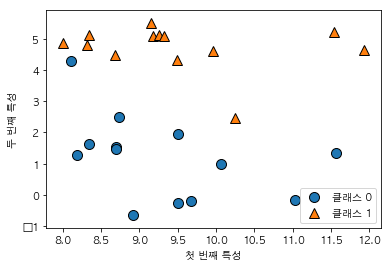

In [56]:
# 데이터 셋을 만듭니다.
X, y = mglearn.datasets.make_forge()
# 산점도를 그립니다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape: {}".format(X.shape))

In [6]:
print(X[:, 0])

[  9.96346605  11.0329545   11.54155807   8.69289001   8.1062269
   8.30988863  11.93027136   9.67284681   8.34810316   8.67494727
   9.17748385  10.24028948   8.68937095   8.92229526   9.49123469
   9.25694192   7.99815287   8.18378052   8.7337095    9.32298256
  10.06393839   9.50048972   8.34468785   9.50169345   9.15072323
  11.563957  ]


In [7]:
print(X[:, 1])

[ 4.59676542 -0.16816717  5.21116083  1.54322016  4.28695977  4.80623966
  4.64866327 -0.20283165  5.13415623  4.47573059  5.09283177  2.45544401
  1.48709629 -0.63993225  4.33224792  5.13284858  4.8525051   1.29564214
  2.49162431  5.09840649  0.99078055 -0.26430318  1.63824349  1.93824624
  5.49832246  1.3389402 ]


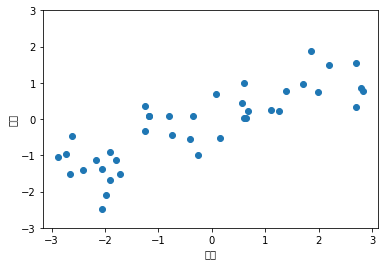

In [8]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타켓")

In [9]:
## cancer 테스트
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [11]:
print("유방안 데이터의 형태: {}".format(cancer.data.shape))

유방안 데이터의 형태: (569, 30)


In [15]:
print("클래스별 샘플 개수: {}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}
))

클래스별 샘플 개수: {'malignant': 212, 'benign': 357}


In [16]:
print("특성 이름: {}".format(cancer.feature_names))

특성 이름: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [18]:
# 보스턴 주택가격
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태: {}".format(boston.data.shape))

데이터의 형태: (506, 13)


In [19]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


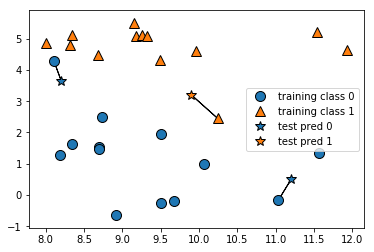

In [20]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

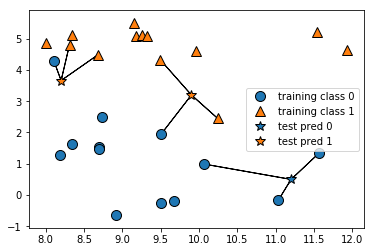

In [21]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

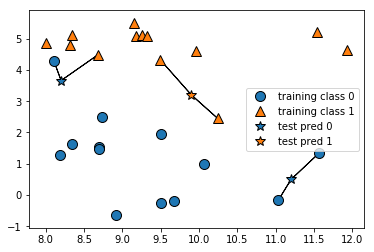

In [22]:
mglearn.plots.plot_knn_classification(n_neighbors=2)

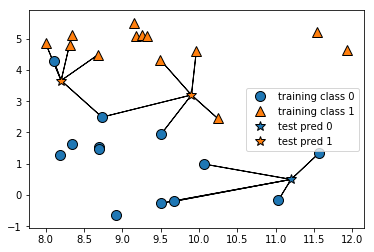

In [23]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

In [44]:
# 이제 시작 forge 예제
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [45]:
print(X_test)

[[ 11.54155807   5.21116083]
 [ 10.06393839   0.99078055]
 [  9.49123469   4.33224792]
 [  8.18378052   1.29564214]
 [  8.30988863   4.80623966]
 [ 10.24028948   2.45544401]
 [  8.34468785   1.63824349]]


In [47]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [48]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [49]:
print("테스트 세트 예측: {}".format(clf.predict(X_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [50]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


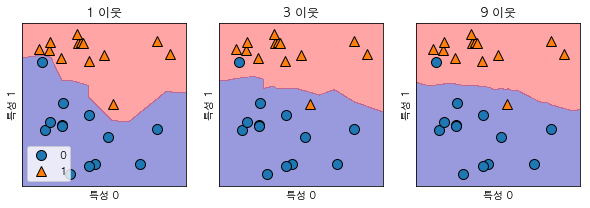

In [57]:
# 결정 경계를 그려줌
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메서드는 self 갤체를 반환합니다.
    # 그래서 객체 생성과 fit 메서드를 한 줄에 쓸 수 있습니다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax,
                                    alpha=.4)
    # 이게 머였지?
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
# 그린다.
axes[0].legend(loc=3)

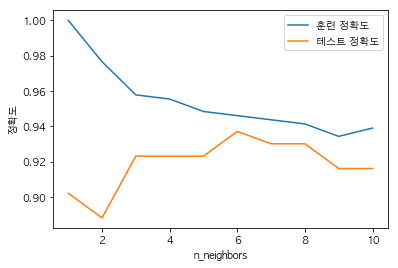

In [59]:
# Cancer 예제
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
# 그린다.
plt.legend()

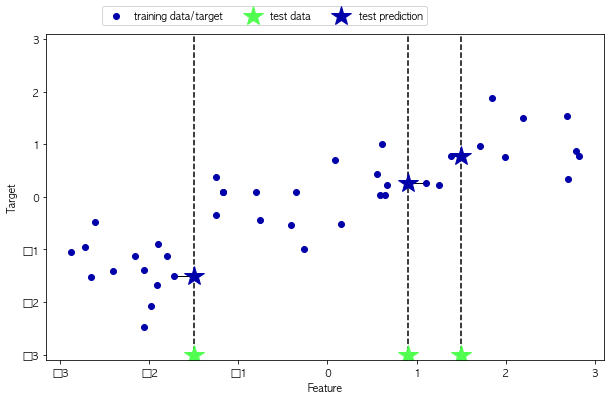

In [60]:
# k-최근접 이웃 회귀
# 회귀 분석에도 사용
mglearn.plots.plot_knn_regression(n_neighbors=1)

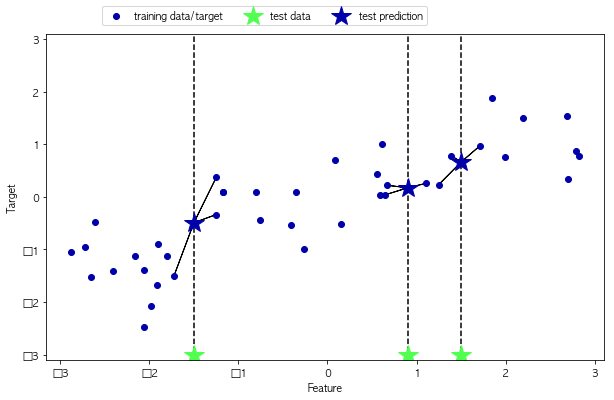

In [61]:
# k-최근접 이웃 회귀
# 회귀 분석에도 사용
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [64]:
# Wave예제
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터 셋을 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다.
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다.
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [65]:
print("테스트 세트 예측: {}".format(reg.predict(X_test)))

테스트 세트 예측: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [66]:
# 회귀일땐 score 메서드는 R^2 값을 반환한다.
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


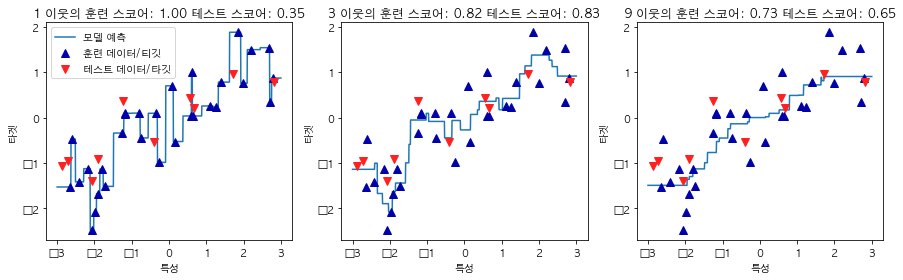

In [75]:
# KNeighborsRegressor 분석
fig, axes = plt.subplots(1, 3, figsize=(15,4))
# -3과 3 사이에 1,000개의 데이터 포인트를 만듭니다.
line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다.
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
        reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타겟")
axes[0].legend(["모델 예측", "훈련 데이터/티깃",
                "테스트 데이터/타깃"], loc="best")
